<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 1, semester 2</center>
<center>Author: Aline Lefebvre-Lepot</center>

# Introduction to Computational Mathematics


&nbsp;

<img src="./figures/ApproxPi.png" alt="Pi" style="width: 570px;"/>

&nbsp;

<div markdown=1 class=Abstract>
In this chapter, we introduce the fundamental notion of **approximation**, which is the basis of Computational Mathematics. Approximation induces errors that have to be controlled. We focus on two kinds of errors: **round-off errors** due to machine representation of numbers and **truncation errors** due to mathematical approximation. Through examples, we show that mathematical analysis allows to study the behavior of errors and we introduce the notions of **convergence** and **speed of convergence**.


### Table of contents

- [Introduction](#intro)
- [Machine representation of numbers: round-off error](#RoundOff)
- [Mathematical approximations: truncation error](#trunc)
- [Total numerical error](#total)

In [9]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

<a id="intro"></a>
## Introduction

Computers are essential to simulate and model complex phenomenons in several domains as physics, biology, economy... Several steps have to be fulfilled to go from the original phenomenon to the simulation result:
- Understand the original phenomenon: physics, economy, biology...
- Write a mathematical model: equations, differential equations, integrals, probabilities...
- Analyse the mathematical model: is there a solution ? how does it behave ? what are its properties ? Are there analytical solutions ?
- Design a numerical method: find a method and an algorithm to approximate the solutions to the mathematical model.
- Analyse the numerical method: does it give precise approximations ? how precise are they ?
- Implement the numerical method on computer
- Visualise and analyse the numerical results

Most of these steps implies approximations: 

- the original phenomenon is approximated by the mathematical model
- the mathematical model is approximated by the numerical method
- the numerical method's result is approximated by the computer

To be confident in the results obtained by computer simulations, one has to be able to say how precise is the approximation at each of these steps: it is essential to evaluate the corresponding error (for example, providing margin of error). Note that, even if one wants the results to be precise, it is also necessary to design efficient numerical methods, to compute these results in a reasonable time.

**Computational mathematics** is the domain of mathematics which aims to design precise and efficient numerical methods, in order to approximate solutions to a given mathematical problem. For the same problem, various numerical methods and algorithms can be proposed. A great part of the research in computational mathematics is devoted to estimate the error behavior induced by the numerical models, in order to be able to compare the different algorithms. 

Before going further, we recall the definition of the absolute and relative error which are used to evaluate the precision of a given approximation. 


<div  markdown=1 class="DoIt"> Complete the following definition.

<div  markdown=1 class="Def">
If $x^*$ is an approximation to $x$,   

- the **absolute error** between $x$ and $x^*$ is ... 
- the **relative error** between $x$ and $x^*$ is ... 

where $|\,x\,|$ is the absolute value of $x$.

The relative error can be expressed in term of percentage.

<div markdown=1 class="Ex">
Approximation of $\pi$:

| Approximation               |    Absolute error   |Relative error| Relative error in $\%$| 
|:-----------:|:-----------------:|:---------:|
| $x^*=22/7$  |  $1.26\times10^{-3}$ |  $4.02\times 10^{-4}$| $4.02\times 10^{-2}\%$ |
| $x^*=3.1416$  |  $7.35\times10^{-6}$ |  $2.34\times 10^{-6}$ | $2.34\times 10^{-4}\%$ |


- If $x^*$ approximates $\pi$ with **absolute error** at most $10^{-3}$, it must belong to the interval $$[\pi-10^{-3},\pi+10^{-3}] \sim [3.1406, 3.1426].$$
- If $x^*$ approximates $\pi$ with **relative error** at most $10^{-3}$, it must belong to the interval $$[\pi(1-10^{-3}),\pi(1+10^{-3})] \sim [3.1385, 3.1447].$$

<div markdown=1 class="Rmk">
The same relative error can occur for widely varying absolute errors :

| Value to be estimated| &nbsp;&nbsp; Approximation &nbsp;&nbsp;| Absolute error|Relative error|
|:--------------------:|:-----------------------:|:------------------:|:----------------:|
| $x=1\times 10^1$     | $x^*=1.1\times 10^1$    |$1\times 10^{-1}$   |$1\times 10^{-1}$ |
| $x=1\times 10^{-3} $ | $x^*=1.1\times 10^{-3}$ | $1.1\times 10^{-4}$|$1\times 10^{-1}$ |
| $x=1\times 10^4 $    | $x^*=1.1\times 10^4$    | $1.1\times 10^{3}$ |$1\times 10^{-1}$ |

The relative error is more meaningful as a measure of accuracy.

<a id="RoundOff"></a>
## Machine representation of numbers: round-off error

<img src="figures/Zuse_z3.jpg" alt="Zuse" style="width: 300px;"/>
  
>**Konrad Zuse (1910-1995) and the Z3-computer.**
>The Z3-computer is said to be the first programmable computer. It was built by Konrad Zuse in 1941. It is based on binary floating-point numbers, is programmable with loops, has a memory and a computation unit. It is often refered as the ancestor of today's computers. 

The arithmetic performed by a computer is different from the arithmetic you use in your theoretical courses. The reason for that is that in the computational world, **the represented numbers can only have a fixed, finite number of digits**.

As a consequence, numbers as $\pi$ or $\sqrt{2}$ cannot be represented exactly and are approximated. Then, for example, $(\sqrt{2})^2$ will not be exactly equal to $2$. 

<div  markdown=1 class="DoIt"> Complete the following script to print $(\sqrt 2)^2$. Try other examples.

In [12]:
## sqrt(2)^2 is not equal to 2

a = sqrt(2)**2
print('sqrt(2)^2 =', a)

sqrt(2)^2 = 2.0000000000000004


Most of the time, the results of the computer calculations are sufficiently precise for the purpose the user has in mind. 

However, that is not always true. The user has to keep in mind that real numbers are approximated and to be aware of the possible problems that it can produce:
- Computers have limited magnitude and precision to represent numbers
- Some arithmetical manipulations are highly sensitive to this approximated representation

### Machine representation of numbers

Before presenting the number representation in computers, let us first recall what is a *number system*. 

<div  markdown=1 class="Ex"> The system we are most familiar with is the *decimal* system (or the *base-10* system). In this system, the numbers are decomposed in sums of powers of $10$:

$$
[6743.7]_{10} = 6\times 10^3 + 7\times 10^2 +4\times 10^1 + 3\times 10^0 + 7\times 10^{-1}
$$


<div  markdown=1 class="Ex"> Computers use the *binary* system (or *base-2* system) to represent numbers:

$$
[1011.1]_{2} = 1\times 2^3 + 0\times 2^2 +1\times 2^1 + 1\times 2^0 + 1\times 2^{-1} \quad(= [11.5]_{10})
$$

More generaly, one can define a system number for any base $\beta$.

<div  markdown=1 class="Def">
**Base-$\beta$ number system. Positional representation.**

For any integer $\beta\geq 2$, the *positional representation* $x_\beta$ of a real $x$ with a finite number of digits is

$$
x_\beta = (-1)^s [x_n\,x_{n-1}\ldots x_1\,x_0\, . \, x_{-1}x_{-2}\ldots x_{-m}]_\beta,
$$
with
$$ s\in\{0,1 \},\quad 0\leq x_k<\beta \quad\text{ for }\quad k=-m\ldots n, \quad\text{ and }\quad x_n\neq 0.
$$

This representation stands for the number
$$
x = (-1)^s\sum_{k=-m}^n x_k \beta^k
$$

A fractional number can have a finite number of digits in a base and an infinite number of digits in another base. 

<div  markdown=1 class="Ex"> The fraction $x=1/3$ has infinite digits in base $10$ with $x_{10}=[0.333\ldots]_{10}$ while it has only one digit in base $3$ : $x_3=[0.1]_3$

To represent numbers in computers, an exponent representation of reals is used. For example, we can write in base $10$

$$
x=-47.258 = (-1)^1 \times 0.47258 \times 10^2.
$$

It can be represented by storing the 4 following values
- the **exponent** : $b=2$ 
- the ** sign of the exponent** :  $s_b=0$ 
- the **mantissa** :  $a=47258$
- the **sign** : $s_a=1$

So that 
$$
x=(-1)^{s_a} \times [0.a]_{10} \times 10^{(-1)^{s_b}[b]_{10}}.
$$

Note that we could also have written

$$
- 47.258 = (-1)^1 \times 0.0047258 \times 10^4
$$

which would have given $s_b=0$, $b=4$, $s_a=1$ and $a=0047258$. 

To ensure uniqueness, the representation is normalized imposing that the first digit of $a$ is different from $0$. We say that all the digits of $a$ are **significant**.

<div  markdown=1 class="Def">
**Normalized exponent representation.**

Let $\beta>0$ be a given basis and $x$ a real. Then, $x$ can be written in a unique way as

$$
x=(-1)^{s_a} \times [0.a]_{\beta} \times \beta^{(-1)^{s_b}[b]_\beta}
$$

where the first digit of $a$ is different from $0$. This is called the *normalized exponent representation* for $x$ in base $\beta$.


One wants to use this normalized exponent representation to represent reals in computers by storing the list $(s_b,b,s_a,a)$. However, computer have a fixed number of places $N$, the *word length*, to store a number. Two places are used to store the signs $s_b$, $s_a$. It remains $N-2$ places for the exponenent $b$ and the mantissa $a$. For a given machine, the number of places available for the exponent and the mantissa are given. If we call them respectively $n$ and $m$, we have $N=m+n+2$. Due to this length restriction, only a finite set of reals can be represented: the so-called **machine numbers**.

<div  markdown=1 class="Def">
**Machine numbers.**

Let $n$ and $m$ be given integers and $\beta>0$ be a biven basis ($n$, $m$ and $\beta$ are given by the machine). Suppose that a real $x$ has the following normalized exponent representation in base $\beta$

$$
x=(-1)^{s_a} \times [0.a]_{\beta} \times \beta^{(-1)^{s_b}[b]_\beta}
$$

with the length of $b$ and $a$ respectively lower than $n$ and $m$.

Then, $x$ is called a *machine number* for the couple $(n,m)$ and the base $\beta$. It can be exaclty represented by the word of size $N=n+m+2$
 
$$|\quad s_b \quad|\quad b \quad|\quad s_a\quad|\quad a \quad|$$

<div  markdown=1 class="Ex"> For $\beta=10$, $n=2$, $m=5$
- The number $x=-47.258=-0.47258\times 10^2$ is represented by the word of length $N=9$ $$|\quad 0 \quad|\quad 02 \quad|\quad 1 \quad|\quad 47258\quad|$$
- The number $x=0.0836=0.836\times 10^{-1}$ is represented by the word of length $N=9$ $$|\quad 1 \quad|\quad 01 \quad|\quad 0 \quad|\quad 83600\quad|$$

As already said, the set $A$ of numbers which are representable in a given machine is finite and most of the real numbers cannot be exaclty represented. These real numbers have to be approximated by a machine number contained in $A$. It is natural to suppose that a real $x\notin A$ should be approximated by $rd(x)\in A$ where $rd(x)$ is the best approximation of $x$ by an element of $A$. Such an approximation can be achieved by **rounding** and is called the floating-point representation of $x$.  

<div  markdown=1 class="Def">
**Floating-point representation and round-off error.**

Let $n$, $m$ and $\beta$ be given and denote by $A$ the corresponding set of machine numbers that can be exactly represented. Consider a real $x\notin A$. Its *floating-point representation* $rd(x)$ is the best approximation of $x$ by an element of $A$:

$$
rd(x)\in A, \quad \text{ and } \quad \forall y\in A, \,\,|x-rd(x)|\leq|x-y|.
$$

The error produced replacing a number $x$ by its floating-point representation $rd(x)$ is called the **round-off error**.

<div  markdown=1 class="Ex"> For $\beta=10$, $n=2$, $m=5$, the number $\pi=3.14159265\ldots$ can be written in the decimal normalized representation as 

$$\pi=0.314159265\ldots\times 10^1.$$

For $m=5$, the decimal machine number approximating $\pi$ is

$$rd(\pi)=0.31416\times 10^1=3.1416,$$

and $\pi$ is represented by the word of length $N=9$ 

$$|\quad 0 \quad|\quad 01 \quad|\quad 1 \quad|\quad 31416\quad|.$$

The corresponding relative round-off error is

$$
\left|\frac{\pi-rd(\pi)}{\pi}\right| \approx 2.34\times 10^{-6}.
$$

Suppose we are working with decimal representations of numbers and that the number of digits $m$ for the mantissa is given. If the normalized exponent representation of $x$ is

$$x=0.a_1a_2...a_m a_{m+1}... \times 10^n,$$

then, its floating-point representation is

$$rd(x)=0.a_1a_2...\tilde a_m \times 10^n,$$

where $\tilde a_m=a_m$ if $a_{m+1}<5$ and $\tilde a_m=a_m+1$ if $a_{m+1}\geq 5$. The corresponding relative round-off error is

\begin{align}
\left|\frac{x-rd(x)}{x}\right|&=\left|\frac{(0.a_1a_2...a_m a_{m+1}...-0.a_1a_2...\tilde a_m)\times 10^n}{0.a_1a_2...a_m a_{m+1}...\times 10^n}\right|\\
&=\left|\frac{(a_m . a_{m+1}...-\tilde a_m)\times 10^{n-m}}{0.a_1a_2...a_m a_{m+1}...\times 10^n}\right|=\left|\frac{a_m . a_{m+1}...-\tilde a_m}{0.a_1a_2...a_m a_{m+1}...}\right|\times 10^{-m}.
\end{align}

Since $a_1\neq 0$, the denominator is greater than $0.1$ and the rounding procedure ensures that the numerator is lower than $0.5$, which gives

$$
\left|\frac{x-rd(x)}{x}\right| \leq \frac{0.5}{0.1}\times 10^{-m} = 5 \times 10^{-m}.
$$

If $\varepsilon=5 \times 10^{-m}$, then we have the following result:

$$
\forall x\in \mathbb{R},\quad rd(x) \,=\, x \, (1-\alpha) \quad \text{ with } |\alpha|<\varepsilon
$$


<div  markdown=1 class="Def">
**Machine precision.**

Consider the floating-point representation for the couple $(n,m)$ and base $\beta$. The *machine precision* $\varepsilon$ is the smallest positive real such that

$$
\forall x\in \mathbb{R},\quad rd(x) \,=\, x \, (1-\alpha) \quad \text{ with } |\alpha|<\varepsilon.
$$

In case of decimal representation, one has $\varepsilon=5 \times 10^{-m}$.

In case of binary representation, one has $\varepsilon=2^{-m}$.

### Floating-point arithmetics

The result of arithmetics operations (addition, substraction...) needs not be machine numbers, even if the operands are. Then, arthmetic operations can not be achieved exactly on computers and finite-digit operations have to be defined. Let us denote by $\oplus$, $\ominus$, $\otimes$ and $\oslash$ the finite digit operators corresponding to the addition, substraction, multiplication and division respectivly. The floating-point (or finite-digit) arithmetic is given by

\begin{align}
x \oplus y = rd(\, rd(x) + rd(y)\,), &\quad\quad\quad x \ominus y = rd(\, rd(x) - rd(y)\,) \\
x \otimes y = rd(\, rd(x) \times rd(y)\,), &\quad\quad\quad x \oslash y = rd(\, rd(x)\,\, / \,\,rd(y)\,) 
\end{align}


<div  markdown=1 class="Ex"> 
For $\beta=10$, $n=2$, $m=5$, let us consider $x=1/3$ and $y=6/7$. We have

\begin{align}
rd\left(\frac{1}{3}\right)&=rd(0.3333333\ldots \times 10^0)=0.33333\times 10^0\\
rd\left(\frac{6}{7}\right)&=rd(0.85714285714285\ldots \times 10^0)=0.85714\times 10^0
\end{align}

and

\begin{align}
\frac{1}{3} \oplus \frac{6}{7} 
&= rd( 0.33333\times 10^0 + 0.85714\times 10^0) \\
&= rd(1.19047\times 10^0) \\
&= rd( 0.119047 \times 10^1) \\
&= 0.11905 \times 10^1
\end{align}

while the exact value is 

$$
\frac{1}{3} + \frac{6}{7} = 0.119047619047619\ldots\times 10^1.
$$

The absolute error is about $2.38\times 10^{-5}$. The relative error is about $2\times 10^{-5}$ which is lower than the expected machine precision for $m=5$.

Most of the time, the results obtained using finite-digit arithmetics are sufficiently accurate for the use we have in mind. However, any computer user has to be aware of some (possibly) problematic consequences of these finite digit computations. The two most common of them are illustrated in the following examples.

<div  markdown=1 class="Ex"> **Addition of a large and a small number: large absolute error.**

For $\beta=10$, $n=2$, $m=5$, let us consider $x=1/3$ and $y=6/7 \times 10^4$. We have

\begin{align}
rd\left(\frac{1}{3}\right)&=rd(0.3333333\ldots \times 10^0)=0.33333\times 10^0\\
rd\left(\frac{6}{7}\times 10^4\right)&=rd(0.85714285714285\ldots \times 10^4)=0.85714\times 10^4
\end{align}

and

\begin{align}
\frac{1}{3} \oplus \left(\frac{6}{7}\times 10^4\right) 
&= rd( 0.33333\times 10^0 + 0.85714\times 10^4) \\
&= rd(8571.73333) \\
&= rd( 0.857173333 \times 10^4)\\
&= 0.85717\times 10^5 = 8571.7
\end{align}

while the exact value is 

$$
\frac{1}{3} + \frac{6}{7}\times 10^4 = 8571.761904761905\ldots.
$$

The relative error is about $7.22\times 10^{-6}$ but **the absolute error is about $0.062$**





<div  markdown=1 class="Ex"> **Substraction of nearly equal numbers: large relative error.**

For $\beta=10$, $n=2$, $m=5$, let us consider $x=0.34523$ and $y=0.3451162368$. We have

\begin{align}
rd\left(x\right)&=0.34523\\
rd\left(y\right)&=0.34512
\end{align}

and

\begin{align}
x \ominus y 
&= rd( 0.34523 - 0.34512) \\
&= rd(0.00011) \\
&= 0.11\times 10^{-3}
\end{align}

while the exact value is 

$$
x-y = 0.1137632\times 10^{-3}.
$$

The absolute error is $0.37632\times 10^{-5}$. **The relative error is about $0.033$ which is much greater than the expected precision for $m=5$. **


The following python example illustrates this behavior with the computer precision. Suppose that you want to compute $$s=x-y$$ for

\begin{align}
x&=1+10^{-15}\\
y&=1
\end{align}
The exact result is of course $s=10^{-15}$

<div  markdown=1 class="DoIt"> Complete the following script to compute $s$.

In [13]:
## substraction of two nearly equal numbers

# definition of x
x = ...
# definition of y
y = ...
# definition the exact result
exact_result = ...
# compute s
numerical_result = ...
# compute absolute error
absolute_error = ...
# compute relative error
relative_error = ...
# print the errors
print('absolute error =', absolute_error, '\nrelative error =', relative_error)

absolute error = Ellipsis 
relative error = Ellipsis


Even for high (but finite) computer precision, the substraction of two nearly equal numbers
leads to a relative error of 11% !

An additional problem that arises when one substracts nearly equal numbers is the **cancellation of significant digits**.  In the previous example, even though $m=5$, $x \ominus y $ only have two significant digits. Indeed, three digits have been cancelled due to the fact that the first three significant digits of $x$ and $y$ are equal. In most of the cases, since $m=5$, the three missing digits will be assigned by the machine (either zero or randomly assigned). As a consequence, all the following computations using $x-y$ will be carried out using these three non-significant digits, leading to results with at most two significant digits, even if $m=5$...

Being aware of such behaviours, the user can avoid the loss of accuracy due to round-off errors by taking care of the order for the different operations or by reformulating the problem. 

**Modifying the order of operations to increase accuracy**

Suppose that you want to compute $$s=a+b+c$$ for

\begin{align}
a&=10^{-15}\\
b&=1\\
c&=-1
\end{align}
The exact result is of course $s=10^{-15}$

In [14]:
## sum of three terms, first method

a = 1e-15
b = 1
c = -1
s1 = (a+b) + c
print('s = (a+b)+c =', s1, '[exact value = a+b+c = 1e-15]')

s = (a+b)+c = 1.1102230246251565e-15 [exact value = a+b+c = 1e-15]


Adding first $a$ and $b$ and then adding $c$ to the previous result leads to a substraction of two nearly equal numbers and a relative error of order $11\%$. Almost all the digits of the result are not significant... To overcome this problem, it suffices to sum $b$ and $c$ and then add $a$:

In [15]:
## sum of three terms, second method

a = 1e-15
b = 1
c = -1
s2 = a + (b+c)
print('s = a+(b+c) =', s2, '[exact value = a+b+c = 1e-15]')

s = a+(b+c) = 1e-15 [exact value = a+b+c = 1e-15]


Remark that we showed here that the finite-digit addition in not associative !

**Reformulation of the problem to increase accuracy**

Suppose you want to compute the roots $(x_1,x_2)$ of the quadratic polynomial

$$
ax^2+bx+c=0,
$$

where

\begin{align}
x_1&=123*10^{-10}\\
x_2&=10^5\\
a&=1\\
b&=-(x_1+x_2)=-10^5-123*10^{-10}\\
c&=x_1x_2=123*10^{-5}
\end{align}

The quadratic formula gives

\begin{align}
x_1&=\frac{-b-\sqrt{b^2-4ac}}{2a}\\
x_2&=\frac{-b+\sqrt{b^2-4ac}}{2a}
\end{align}

In the previous example, we have $b^2>>4ac$ so that the formula for $x_1$ leads to the substraction of two nearly equal numbers ($b$ is negative). The following program computes $x_1$ and $x_2$ from these formula:

<div  markdown=1 class="DoIt"> Complete the following script to compute $x_1$ and $x_2$.

In [16]:
## roots of quadratic polynoms, classical formulation

x1 = 123*1e-10
x2 = 1e5
a = 1
b = -100000.0000000123
c = 123*1e-5
# compute x1
x1num = ...
# compute x2
x2num = ...
print('x1 = ', x1num, '[exact value = 1.23e-8] \nx2 = ', x2num, '[exact value = 100000]')

x1 =  Ellipsis [exact value = 1.23e-8] 
x2 =  Ellipsis [exact value = 100000]


Doing so, we obtain a relative error of order $8\%$ for $x_1$... 

A method to avoid this loss of accuracy is to compute the "good" root (in our case $x_2$, it depends on the sign of $b$) using the previous formula and then, use the equality $c=x_1x_2$ to compute the second one: 

\begin{align}
\tilde x_2&=\frac{-b-sign(b)\sqrt{b^2-4ac}}{2a}\\
\tilde x_1&=\frac{c}{x_1}
\end{align}

<div  markdown=1 class="DoIt"> Use these new formula to compute $x_1$ and $x_2$.

In [17]:
## roots of quadratic polynoms, accurate formulation

x1 = 1e5
x2 = 123*1e-10
a = 1
b = -100000.0000000123
c = 123*1e-5
# compute x2
x2num2 = ...
# compute x1
x1num2 = ...
print('x2 = ', x2num2, '[exact value = 100000] \nx1 = ', x1num2, '[exact value = 1.23e-8]')

x2 =  Ellipsis [exact value = 100000] 
x1 =  Ellipsis [exact value = 1.23e-8]


This new computation is now accurate up to machine precision for both of the two roots.

<a id="trunc"></a>
## Mathematical approximations: truncation error

The previous section presented one of the source of errors (round-off errors) appearing when one tries to solve numerically a problem. All the algorithms proposed were supposed to give the exact solution to the problem if performed using exact arithmetics. For a wide class of problems, there does not exist exact algorithms to compute the solution. In that case, one has to design algorithms capable to approximate the solution. One of the main challenge in that case is to obtain algorithms giving "good" approximations, that is with "small" truncation errors. Before going further, let us define what is an algorithm.

<div  markdown=1 class="Def">
**Algorithm.**

An algorithm is a set of directives specifying how to solve (or approximate the solution to) a given problem. It must have the feature of terminating after a finite number of elementary operations.

The inputs of the algorithm are given at its beginning. Some of the inputs are given by the problem you want to solve. There can also be other inputs, called **discretization parameters**, which are given by the numerical method chosen to approximate the problem. 

For example, the procedures described in the above section to compute $s=a+b+c$ or the roots of quadratic polynomials are algorithms. The two procedures to compute $s$ can be described as:

<div  markdown=1 class="Algo">
**Algorithms to compute $s=a+b+c$.**

Algorithm 1:
\begin{align}
INPUT:&\quad a,b,c\\
DO:&\quad s=a+b\\
&\quad s=s+c\\
RETURN:&\quad s\\
\end{align}

Algorithm 2:
\begin{align}
INPUT:&\quad a,b,c\\
DO:&\quad s=b+c\\
&\quad s=s+a\\
RETURN:&\quad s\\
\end{align}

These two algorithms are exacts: if performed using exact arithmetics, they are supposed to return the same exact value $s$. The inputs $a$, $b$ and $c$ are given by the problem and no discretization parameters are needed.

Suppose now that you want to compute $x^*$ solution to a given problem that cannot be exactly computed using elementary operations. In that case, one can use an approximation of $x^*$, depending on a discretization parameter. For example, suppose you want to compute $x^*=f'(a)$, $f$ being a derivable funcion and $a$ a given real.

Several approximations of $f'(a)$ can be suggested by recalling that the derivative of $f$ in $a$ is the slope of the tangent to the graph of $f$ at point $a$. This slope can be approximated by the slope of secants to the graph of $f$ passing through two points of the graph, close to point $(a,f(a))$.

<img src="./figures/ApproxDer.png" alt="ApproxDer" style="width: 450px;"/>


<div  markdown=1 class="DoIt"> Complete the two following approximations. $x_h$ and $\bar x_h$ correspond to the approximation using the slope of secant 1 and 2 respectively.
Also complete the two algorithms.

For example, $x^*=f'(a)$ can be approximated for small $h$ by the formula

$$
f'(a) \approx x_h = \frac{f(a+h)-f(a)}{h}
$$

or 

$$
    f'(a) \approx \bar x_h = \frac{f(a+h)-f(a-h)}{h}
$$

This leads to the two following algorithms, returning $x_h$ and $\bar x_h$ respectively for a given value of $h$:

<div  markdown=1 class="Algo">
**Algorithm 1 to compute $x_h$, approximation of $x^*=f'(a)$.**

\begin{align}
INPUT:  & \quad a, f, h  \\
DO:     & \quad x = ...  \\
RETURN: & \quad x        \\
\end{align}

<div  markdown=1 class="Algo">
**Algorithm 2 to compute $\bar x_h$, approximation of $x^*=f'(a)$.**

\begin{align}
INPUT:  & \quad a, f, h \\
DO:     & \quad x = ... \\
RETURN: & \quad x       \\
\end{align}

The inputs of the algorithms are of two types: the problem parameters $a$ and $f$, and the discretization parameter $h$. In that case, even using exact arithmetics, the result is an approximation of $x^*$. Its quality depends on the discretization parameter $h$ and one would like to estimate the corresponding errors. 

<div  markdown=1 class="Def">
** Truncation error**

Consider an algorithm designed to compute an approximation of the solution $x^*$ to a given problem. Denote by $\eta$ the list of discretization parameters given as inputs to the algorithm (i.e. inputs of the algorithm not given by the initial problem). If $x_\eta$ is the approximation of $x^*$ computed using these discretization parameters, then the *truncation error* for  these parameters is

$$
e_\eta=\left|\, x^*-x_\eta \,\right|.
$$

This error is evaluated supposing that $x_\eta$ is computed using exact arithmetics.

<div  markdown=1 class="Ex">
The parameter driving the precision in the algorithms computing $x^*=f'(a)$ is $h$. The truncation error for these algorithms depends on $h$:

$$e_h=\left|\, f'(a)-x_h \,\right| \quad \text{ and } \quad \bar e_h=\left|\, f'(a)-\bar x_h \,\right|.$$

The quality of an algorithm depends on the behavior of the truncation error. Of course, the objective is to compute approximations of $x^*$ as precise as possible and converging to $x^*$ in some sense (i.e. the error converging to zero). In that case we say that **the algorithm converges**.

Let us use the two previous algorithms proposed to compute $x^*=f'(a)$ for $f(x)=x^5$ and $a=1$. We define above the corresponding functions:

<div  markdown=1 class="DoIt"> Complete the following function $f: x\to f(x)$. If the input is a vector $x=(x_i)_i$, it has to return the vector $(f(x_i))_i$. Take care not to use any loop.

In [18]:
## Function f: x -> x^5
## input : x = discretization parameter (can be a real or an array of reals)
## output : real f(x)  if x is real
##          array (f(xi))_i if x=(xi)_i is an array
import numpy as np
def f(x):
    return x**5

# Test 
x=2
print('f(2) =',f(x))
x=np.array([2,3])
print('f([2 3]) =',f(x))

f(2) = 32
f([2 3]) = [ 32 243]


<div  markdown=1 class="DoIt"> Complete the two following functions that return the two approximations of the derivative of $f$ at point $a$, with discretization parameter $h$.

In [19]:
## Function that computes x_h = (f(a+h)-f(a))/h for a given a
## input : f = function 
##         a = point where the derivative has to be approximated
##         h = discretization parameter (can be a real or an array of reals)
## output : real x_h = (f(a+h)-f(a))/h  if h is real
##          array x_h such that x_h[i] = (f(a+h[i])-f(a))/h[i] if h is an array

def ApproxDerivative1(f, a, h):
    return (f(a+h)-f(a))/h


In [26]:
## Function that computes x_h = (f(a+h)-f(a-h))/2h for a given a
## input : a = point where the derivative has to be approximated
##         h = discretization parameter
## output : real x_h = (f(a+h)-f(a-h))/h  if h is real
##          array x_h such that x_h[i] = (f(a+h[i])-f(a-h[i]))/h[i] if h is an array

def ApproxDerivative2(f, a, h):
    return (f(a+h)-f(a-h))/(2*h)


We test the previous functions by computing approximations of $f'(1)=5$:

<div  markdown=1 class="DoIt"> Complete the following script to test the two previous approximations.

In [27]:
## Test of the two formulas computing a derivative

a = 1
h = 0.01
x1 = (f(a+h)-f(a))/h # first algorithm
x2 = (f(a+h)-f(a-h))/(2*h) # second algorithm
print('a=', a, ', h=', h, ', exact value: f\'(1)=5')
print('Result given by the first algorithm:', x1)
print('Result given by the second algorithm:', x2)

a= 1 , h= 0.01 , exact value: f'(1)=5
Result given by the first algorithm: 5.101005010000015
Result given by the second algorithm: 0.0005001000010000011


For this test, the approximation given by algorithm 2 is better than the one obtained using algorithm 1 for the same value of $h$. To observe more precisely the behavior of the two algorithms, the following code plots the value of the truncation error $e_h$ versus the discretization parameter $h$ when $h$ goes to zero, using a log-log scale:

<div  markdown=1 class="DoIt"> Complete the following script to compare the errors of the two algorithms versus $h$.

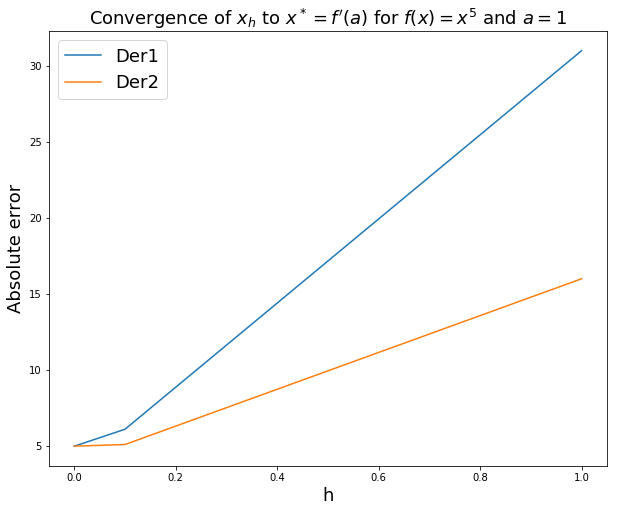

In [28]:
## behavior of the error for the two formulas computing a derivative

# point a
a = 1

#sequence of h = [1, 1e-1, 1e-2 ... 1e-5]
n = np.arange(6)
h = 10.**(-n)

# approximation of f'(a) using the first algorithm
# and the corresponding error (vector)
Der1 = ApproxDerivative1(f, a, h)
Err1 = abs(Der1 - 5.)

# approximation of f'(a) using the second algorithm
# and the corresponding error (vector)
Der2 = ApproxDerivative2(f, a, h)
Err2 = abs(Der2 - 5.)

# plot of the errors versus h
fig = plt.figure(figsize=(10, 8))
plt.plot(h,Der1,label='Der1') # plot error 1 versus h
plt.plot(h,Der2,label='Der2')  # plot error 2 versus h
plt.legend(loc='upper left', fontsize=18)
plt.xlabel('h', fontsize=18)
plt.ylabel('Absolute error', fontsize=18)
plt.title('Convergence of $x_h$ to $x^*=f\'(a)$ for $f(x)=x^5$ and $a=1$', fontsize=18)

plt.show()


This figure confirms that both errors $e_h$ and $\bar e_h$ seem to converge to zero when $h$ goes to zero.

This convergence is quicker for the second algorithm than for the first one. Indeed, for $\bar x_h$, precision $10^{-3}$ is obtained for $h\approx 10^{-2}$, while it requires a much smaller $h\approx 10^{-4}$ for $x_h$.

_**These numerical observations (convergence, speed of convergence...) have to be confirmed/proved by a theoretical study of the error. However, since the solution to the problem is not known, this error cannot be explicitly  computed and one has prove that it is bounded by a quantity converging to zero. Such a bound, if explicit, is called an error estimator.**_

Here, a study of the remainder of Taylor expansions of $f$ about point $a$ can be achieved in order to quantify the error and its dependance on $h$ for each algorithm.

Indeed, supposing $f\in \cal{C}^2([a,b])$, from Taylor's theorem (see appendix), we have

$$
\forall h\geq 0, \quad\exists \xi_+ \in ]a,a+h[ \quad\text{ such that }\quad f(a+h) = f(a) + f'(a)\, h + \frac{f''(\xi_+)}{2!}\,h^2.
$$

This gives, for $h\leq 1$

$$
e_h = \left|\, f'(a) - \frac{f(a+h)-f(a)}{h} \,\right| = \left| \frac{f''(\xi_+)}{2!}\,h \right| \leq \frac{\sup_{[0,1]}{\left|f''\right|}}{2!}\,h = M_1\, h
$$

where $M_1$ is a constant independant of $h$. From this, we prove the convergence of the first algorithm:

$$e_h = \left|\, f'(a)-x_h \,\right|\to 0 \quad \text{ when } \quad h\to 0.$$

To study the convergence of the second algorithm, we suppose $f\in \cal{C}^3([a,b])$ and use Taylor's theorem at rank $3$:

$$
\forall h\geq 0, \quad\exists \xi_+ \in ]a,a+h[ \quad\text{ such that }\quad f(a+h) = f(a) + f'(a)\, h + \frac{f''(a)}{2!} \, h^2 +  \frac{f'''(\xi_+)}{3!}\,h^3
$$

and 

$$
\forall h\geq 0, \quad\exists \xi_- \in ]a-h,a[ \quad\text{ such that }\quad f(a-h) = f(a) - f'(a)\, h + \frac{f''(a)}{2!} \, h^2 +  \frac{f'''(\xi_-)}{3!}\,h^3
$$

This gives, for $h\leq 1$

$$
\bar e_h = \left|\, f'(a) - \frac{f(a+h)-f(a-h)}{2h} \,\right| = \left| \frac{f'''(\xi_+)-f'''(\xi_-)}{2\times 3!}\,h^2 \right|\leq \frac{2 \sup_{[0,1]}{\left|f''' \right|}}{2\times 3!}\,h^2 = M_2\, h^2
$$

where $M_2$ is a constant independant of $h$. From this, we now have the convergence of the second algorithm:

$$\bar e_h = \left|\, f'(a)- \bar x_h \,\right|\to 0 \quad \text{ when } \quad h\to 0.$$

From the explicit estimations

$$
e_h \leq M_1 h \quad \text{and} \quad \bar e_h \leq M_2 h^2
$$

we can even extract more precise information about the behavior of the error when $h$ goes to zero. 

For example, we have proved that the bound  behaves like $h$ for the first algorithm (we say that the error is of **order 1**) and  like $h^2$ for the second (we say that the error is of **order 2**).  The **speed of convergence** is quantified by the order of the error in $h$.  We recover here that algorithm 2 converges quicker to $f'(a)$ than algorithm 1.


The explicit bound can also be used to obtain a quantitative information about the precision of the approximation obtained for a given value of $h$. Indeed, in general, the value of $x^*$ is not known and the numerical error cannot be computed. We proved that the error is less than this estimation so the previous explicit bounds can be used to quantify how precise is the numerical result for a given $h$. 

We have $M_1=40$ and $M_2= 160/6$ and we compare in the following tables the errors and the estimated bounds for the two algorithms:

|&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp; $e_h$ &nbsp;&nbsp;|  numerical error | estimated bound|&nbsp;&nbsp; $\bar e_h$ &nbsp;&nbsp; |  numerical error | estimated bound |
|:--------------------:|:--------------------:|:-----------------------:|:------------------:|:------------------:|:--------------------:|:-----------------------:|
|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$h=1e+00$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp; |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$2.60000000e+01 $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| $4.0e+01$   | &nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$ 1.10000000e+01 $&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | $  2.666...e+01$   |
|&nbsp;&nbsp; $h=1e-01$&nbsp;&nbsp; |&nbsp;    | $1.10510000e+00$| $4.0e+00$ |&nbsp;&nbsp; | $ 1.00100000e-01 $ | $ 2.666...e-01 $   |
|&nbsp;&nbsp; $h=1e-02$  &nbsp;&nbsp;  |&nbsp;| $1.01005010e-01$| $4.0e-01$    | &nbsp;&nbsp; | $  1.00001000e-03 $ | $ 2.666...e-03 $   |
| &nbsp;&nbsp;$h=1e-03$ &nbsp;&nbsp;|&nbsp;   | $1.00100050e-02$| $4.0e-02$    | &nbsp;&nbsp; | $  1.00000007e-05$ | $ 2.666...e-05 $   |
|&nbsp;&nbsp; $h=1e-04$ &nbsp;&nbsp;|&nbsp;   | $1.00010000e-03$| $4.0e-03$    | &nbsp;&nbsp; | $ 9.99994576e-08 $ | $ 2.666...e-07 $   |
|&nbsp;&nbsp; $h=1e-05$ &nbsp;&nbsp;|&nbsp;   | $1.00001040e-04$| $4.0e-04$    | &nbsp;&nbsp; | $  1.00975228e-09$ | $ 2.666...e-09 $   |

One can observe that the numerical error is below the theoretical bound and that this bound is a rather good estimation for the error. **As a consequence, $h$ being given, one can estimate the precision of the approximation given by the two algorithms by using these explicit bounds (error estimators).**


**The explicit estimation of the error also allows to choose adequately the value of the discretization parameter needed to reach a given precision.** For example, suppose you want to estimate $x^*=f'(a)$ and to be precise up to $10^{-6}$, The previous estimation says that you can reach this precision with $h=10^{-6}/M_1=2.5\times 10^{-8}$ using the first algorithm and $h=\sqrt{10^{-6}/M_2}=1.936\times 10^{-4}$ using the second one.

 

<div markdown=1 class="Rmk">
Note that the order $n$ of the method can be recovered numerically from the log-log plot of the error versus $h$: since 
$$
e_h \leq M h^n,
$$ 

we have
$$
\log e_h \leq n \log h + \log M
$$

and, if the bound is accurate, $n$ is equal to the slope of the plotted line in log-log scale. 

The order of the method can also be observed in the previous table. Indeed, in case of a method of order $n$, dividing $h$ by $\alpha$ divides the error by $\alpha^n$. In our example, when $h$ is divided by $10$, the error is divided by $10$ for the first algorithm and by $100$ for the second. 

<a id="total"></a>
## Total numerical error

When computing an approximation of the solution to a given problem, the total error is made of both the error due to the mathematical approximation of the problem (truncation error) and errors due to the use of finite-digit approximations in computers (round-off errors)

To illustrate this, let us consider the first algorithm we proposed in the previous section to estimate the derivative $f'(a)$:

$$
x_h= \frac{f(a+h)-f(a)}{h}.
$$

When $h$ is very small, it consists in a substraction of the two nearly equal reals $f(a+h)$ and $f(a)$ which can induce a high round-off error and this error is increased due to the division by the small real $h$.

The approximation of $f'(a)$ given by the computer is in fact

$$
\tilde x_h = rd\left(\,\,(\,\,rd(f(a+h))\ominus rd(f(a))\,\,)\,\,\oslash\,\, rd(h)\,\,\right)
$$

so that the error can be spilt in two terms:

\begin{align}
\tilde e_h &= \left|\, f'(a) - \tilde x_h \,\right| \\
&= \left|\, f'(a) - \frac{f(a+h)-f(a)}{h} + \frac{f(a+h)-f(a)}{h} - \tilde x_h\,\right| \\
&\leq \left|\, f'(a) - \frac{f(a+h)-f(a)}{h}\,\right| + \left|\,\frac{f(a+h)-f(a)}{h} - \tilde x_h \,\right|\\
& \quad\quad \text{Truncation error} \quad\quad+\quad\quad \text{Round-off error}
\end{align}

We already proved that the truncation error goes to zero when $h$ goes to zero. On the contrary, the round-off error increases for $h$ very small. As a consequence, for $h$ too small, the round-off error can become greater than the truncation error, which deteriorates the approximation. This can be observed for both of the previous algorithms by plotting the error versus $h$ for smaller values of $h$ than in the previous study:

<div  markdown=1 class="DoIt"> Run the following cell to observe the total numerical error for a wide range of $h$.

In [12]:
## behavior of the error (small h) for the two formulas computing a derivative

# point a
a = 1

#sequence of h = [1, 1e-1, 1e-2 ... 1e-5]
n = np.arange(15)
h = 10.**(-n)


# approximation of f'(a) using the first algorithm
# and the corresponding error
Der1 = ApproxDerivative1(f, a, h)
Err1 = abs(Der1 - 5.)

# approximation of f'(a) using the second algorithm
# and the corresponding error
Der2 = ApproxDerivative2(f, a, h)
Err2 = abs(Der2 - 5.)

# plot of the errors versus h
fig = plt.figure(figsize=(10, 8))
plt.loglog(h, Err1, marker="o", label="Algorithm 1")
plt.loglog(h, Err2, marker="o", label="Algorithm 2")
plt.legend(loc='upper left', fontsize=18)
plt.xlabel('h', fontsize=18)
plt.ylabel('Absolute error', fontsize=18)
plt.title('Convergence of $x_h$ to $x^*=f\'(a)$ for $f(x)=x^5$ and $a=1$', fontsize=18)

plt.show()


NameError: name 'plt' is not defined

For sufficiently big values of $h$, the error is dominated by the truncation error: we observe the convergence to zero of the error with order $1$ or $2$ depending on the algorithm. Then, below a given value of $h$, the round-off error becomes dominant and the total error increase... One has to be aware of such behaviors to be able to chose efficiently the discretization parameters.

## Appendix

### Taylor's theorem

<table>
        <tr>
            <td><img src="figures/Brook_Taylor.jpg" alt="Taylor" style="width: 170px;" /></td>
            <td><img src="figures/Lagrange.jpg" alt="Lagrange" style="width: 150px;" /></td>
        </tr>
</table>

>**Brook Taylor (1685 – 1731) and Joseph-Louis Lagrange (1736 - 1813).**
>Brook Taylor is an english mathematician and was also musician and painter artist. He is best known for the so-called Taylor's theorem and Taylor series that can be found in its book *Methodus incrementorum directa et inversa* (without rest nor convergence result) . In this book, one can also found the integration by parts formula and the prinicples of finite differences. It remained quite unknown until the italian mathematician and astronomer Joseph-Louis Lagrange discoverd its importance in 1772, to the point of considering Taylor's work to be the *foundation of differential calculus*. 

We recall below Taylor's theorem:

<div  markdown=1 class="Thm">
** Taylor's Theorem**

Suppose $f\in C^n[a,b]$, $f^{(n+1)}$ exists on $[a,b]$ and $x_0\in [a,b]$. For every $x\in [a,b]$, there exists $\xi(x)$ between $x_0$ and $x$ with 

$$
f(x) = P_n(x) + R_n(x),
$$

where 

\begin{align}
P_n(x) &= f(x_0) + f'(x_0) (x-x_0) + \frac{f''(x_0)}{2!} (x-x_0)^2 + \ldots +  \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n\\
&=\sum_{k=0}^n \frac{f^{(k)}(x_0)}{k!} (x-x_0)^k,
\end{align}

and

$$
R_n(x) = \frac{f^{(n+1)}(\xi(x))}{(n+1)!} (x-x_0)^{n+1}.
$$

$P_n$ is called the **$n$-th Taylor polynomial** for $f$ about $x_0$ and $R_n$ is called the **remainder term** associated with $P_n$. 

In [13]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: './style/custom2.css'